GOOGLE LINK: https://drive.google.com/file/d/1bktJx8rxqsUMChuiUcMylAYFtQFEDnK7/view

# Assignment 1
- Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. Here is the code to load the data:
    - import numpy as np
    - import pandas as pd
    - import scipy.stats as stats
    - import matplotlib.pyplot as plt
    - import sklearn
    - from sklearn.datasets import load_boston
    - boston = load_boston()
    - bos = pd.DataFrame(boston.data)

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

- We also have to load the target values in a separate dataframe, but we will concatenate it to the original dataframe
- We have to give meaningful names to each column to bos dataframe

In [6]:
bos_target= pd.DataFrame(boston.target, columns= ['MEDV'])
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bos.columns= cols
bos= bos.join(bos_target)

In [7]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- Each of the column name descriptions are provided as:
    - CRIM - per capita crime rate by town
    - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS - proportion of non-retail business acres per town.
    - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - NOX - nitric oxides concentration (parts per 10 million)
    - RM - average number of rooms per dwelling
    - AGE - proportion of owner-occupied units built prior to 1940
    - DIS - weighted distances to five Boston employment centres
    - RAD - index of accessibility to radial highways
    - TAX - full-value property-tax rate per 10,000
    - PTRATIO - pupil-teacher ratio by town
    - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT - % lower status of the population
    - MEDV - Median value of owner-occupied homes in $1000's

In [8]:
# describe the data
bos.drop(['MEDV'], axis= 1).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- No values are missing in any of the columns, evident from count.
- Different columns have different ranges, so data has to be standardized before applying regression.
- Next step is to check for linear relationships b/w predictors & target using scatter plots:

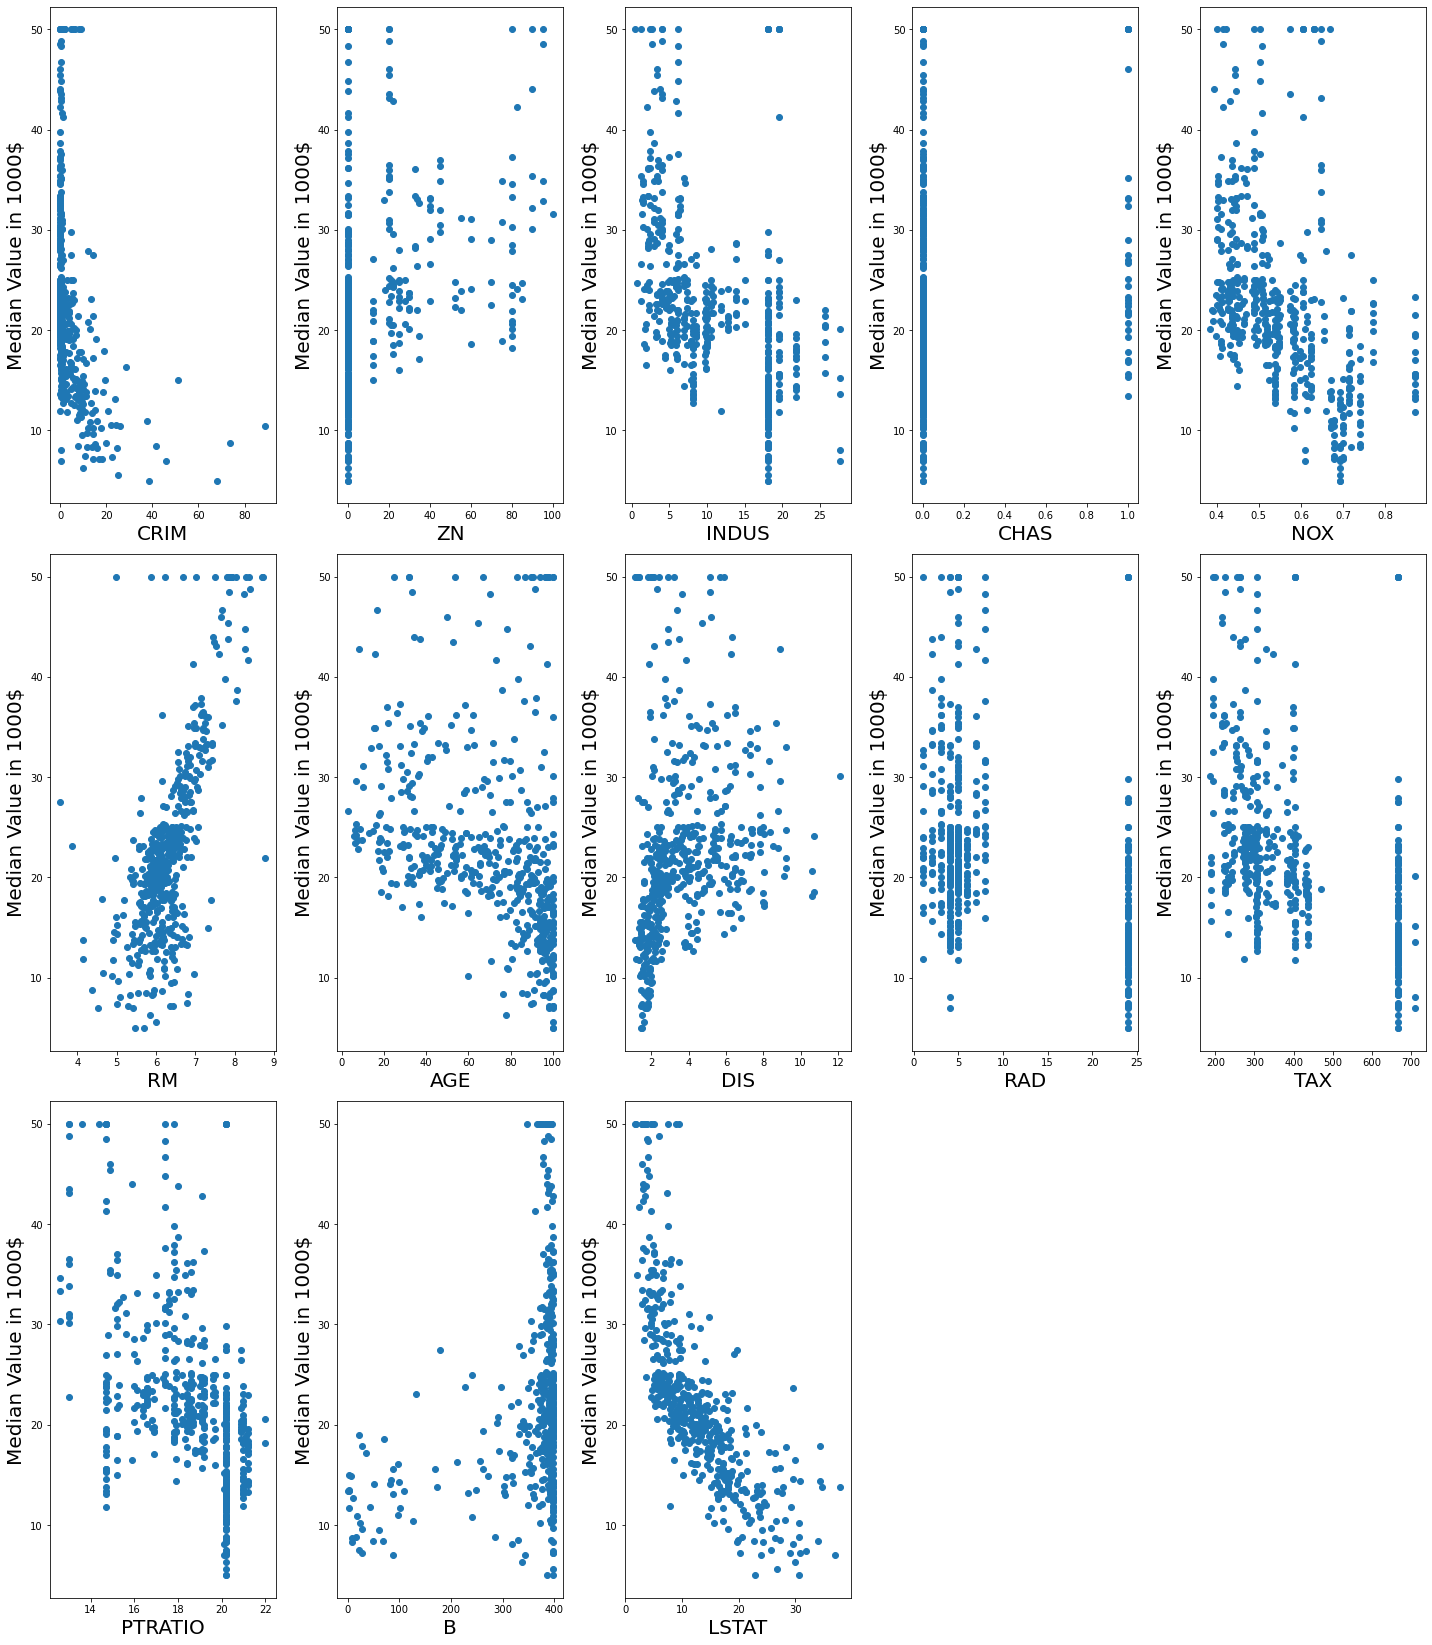

In [9]:
plt.figure(figsize=(20, 30), facecolor='white')
plotnumber = 1

for column in bos.drop(['MEDV'], axis= 1):
    ax = plt.subplot(4, 5, plotnumber)
    plt.scatter(bos[column], bos['MEDV'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Median Value in 1000$', fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

- Quite a few predictors seem to be categorical in nature.
- None of the predictors seem to display strong linear relationship with the target variable.

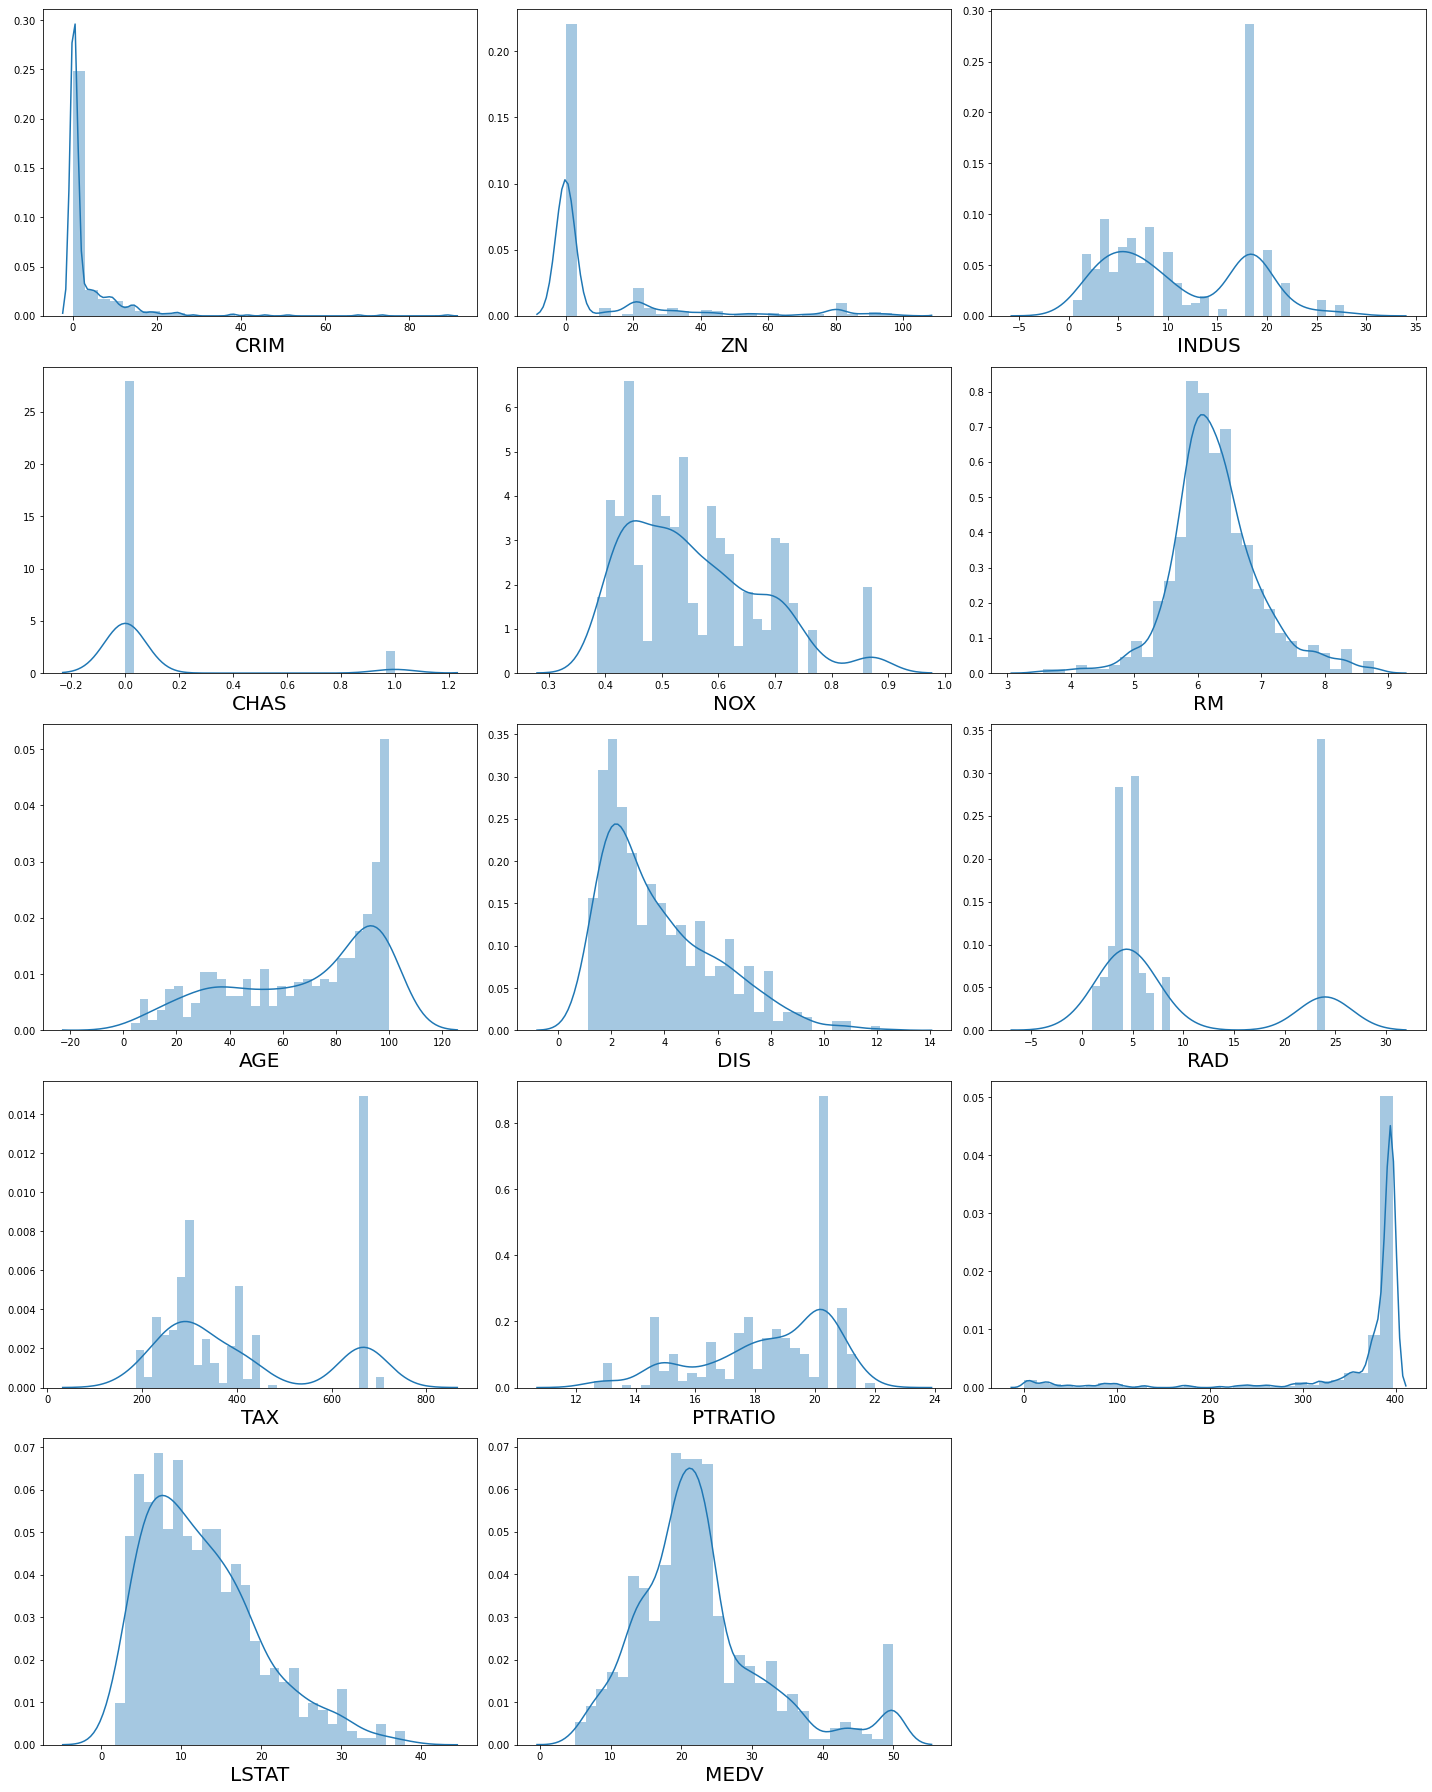

In [10]:
import seaborn as sns

plt.figure(figsize=(20, 25), facecolor='white')
plotnumber= 1

for column in bos:    
    ax = plt.subplot(5, 3, plotnumber)
    sns.distplot(bos[column], bins= 30)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

- Features like NOX, AGE, DIS, RM, LSTAT & RM seem to be normally distributed, though some are +vely or -vely skewed. Some variables seem to contain outliers towards their tails.
- Features like CRIM, ZN & B seem to have Exponential Distributions. We have to convert these into Normal distributions if these variables seem to be important predictors in our model.
- Next, check the relationship b/w all the features simultaneously using pairplot:

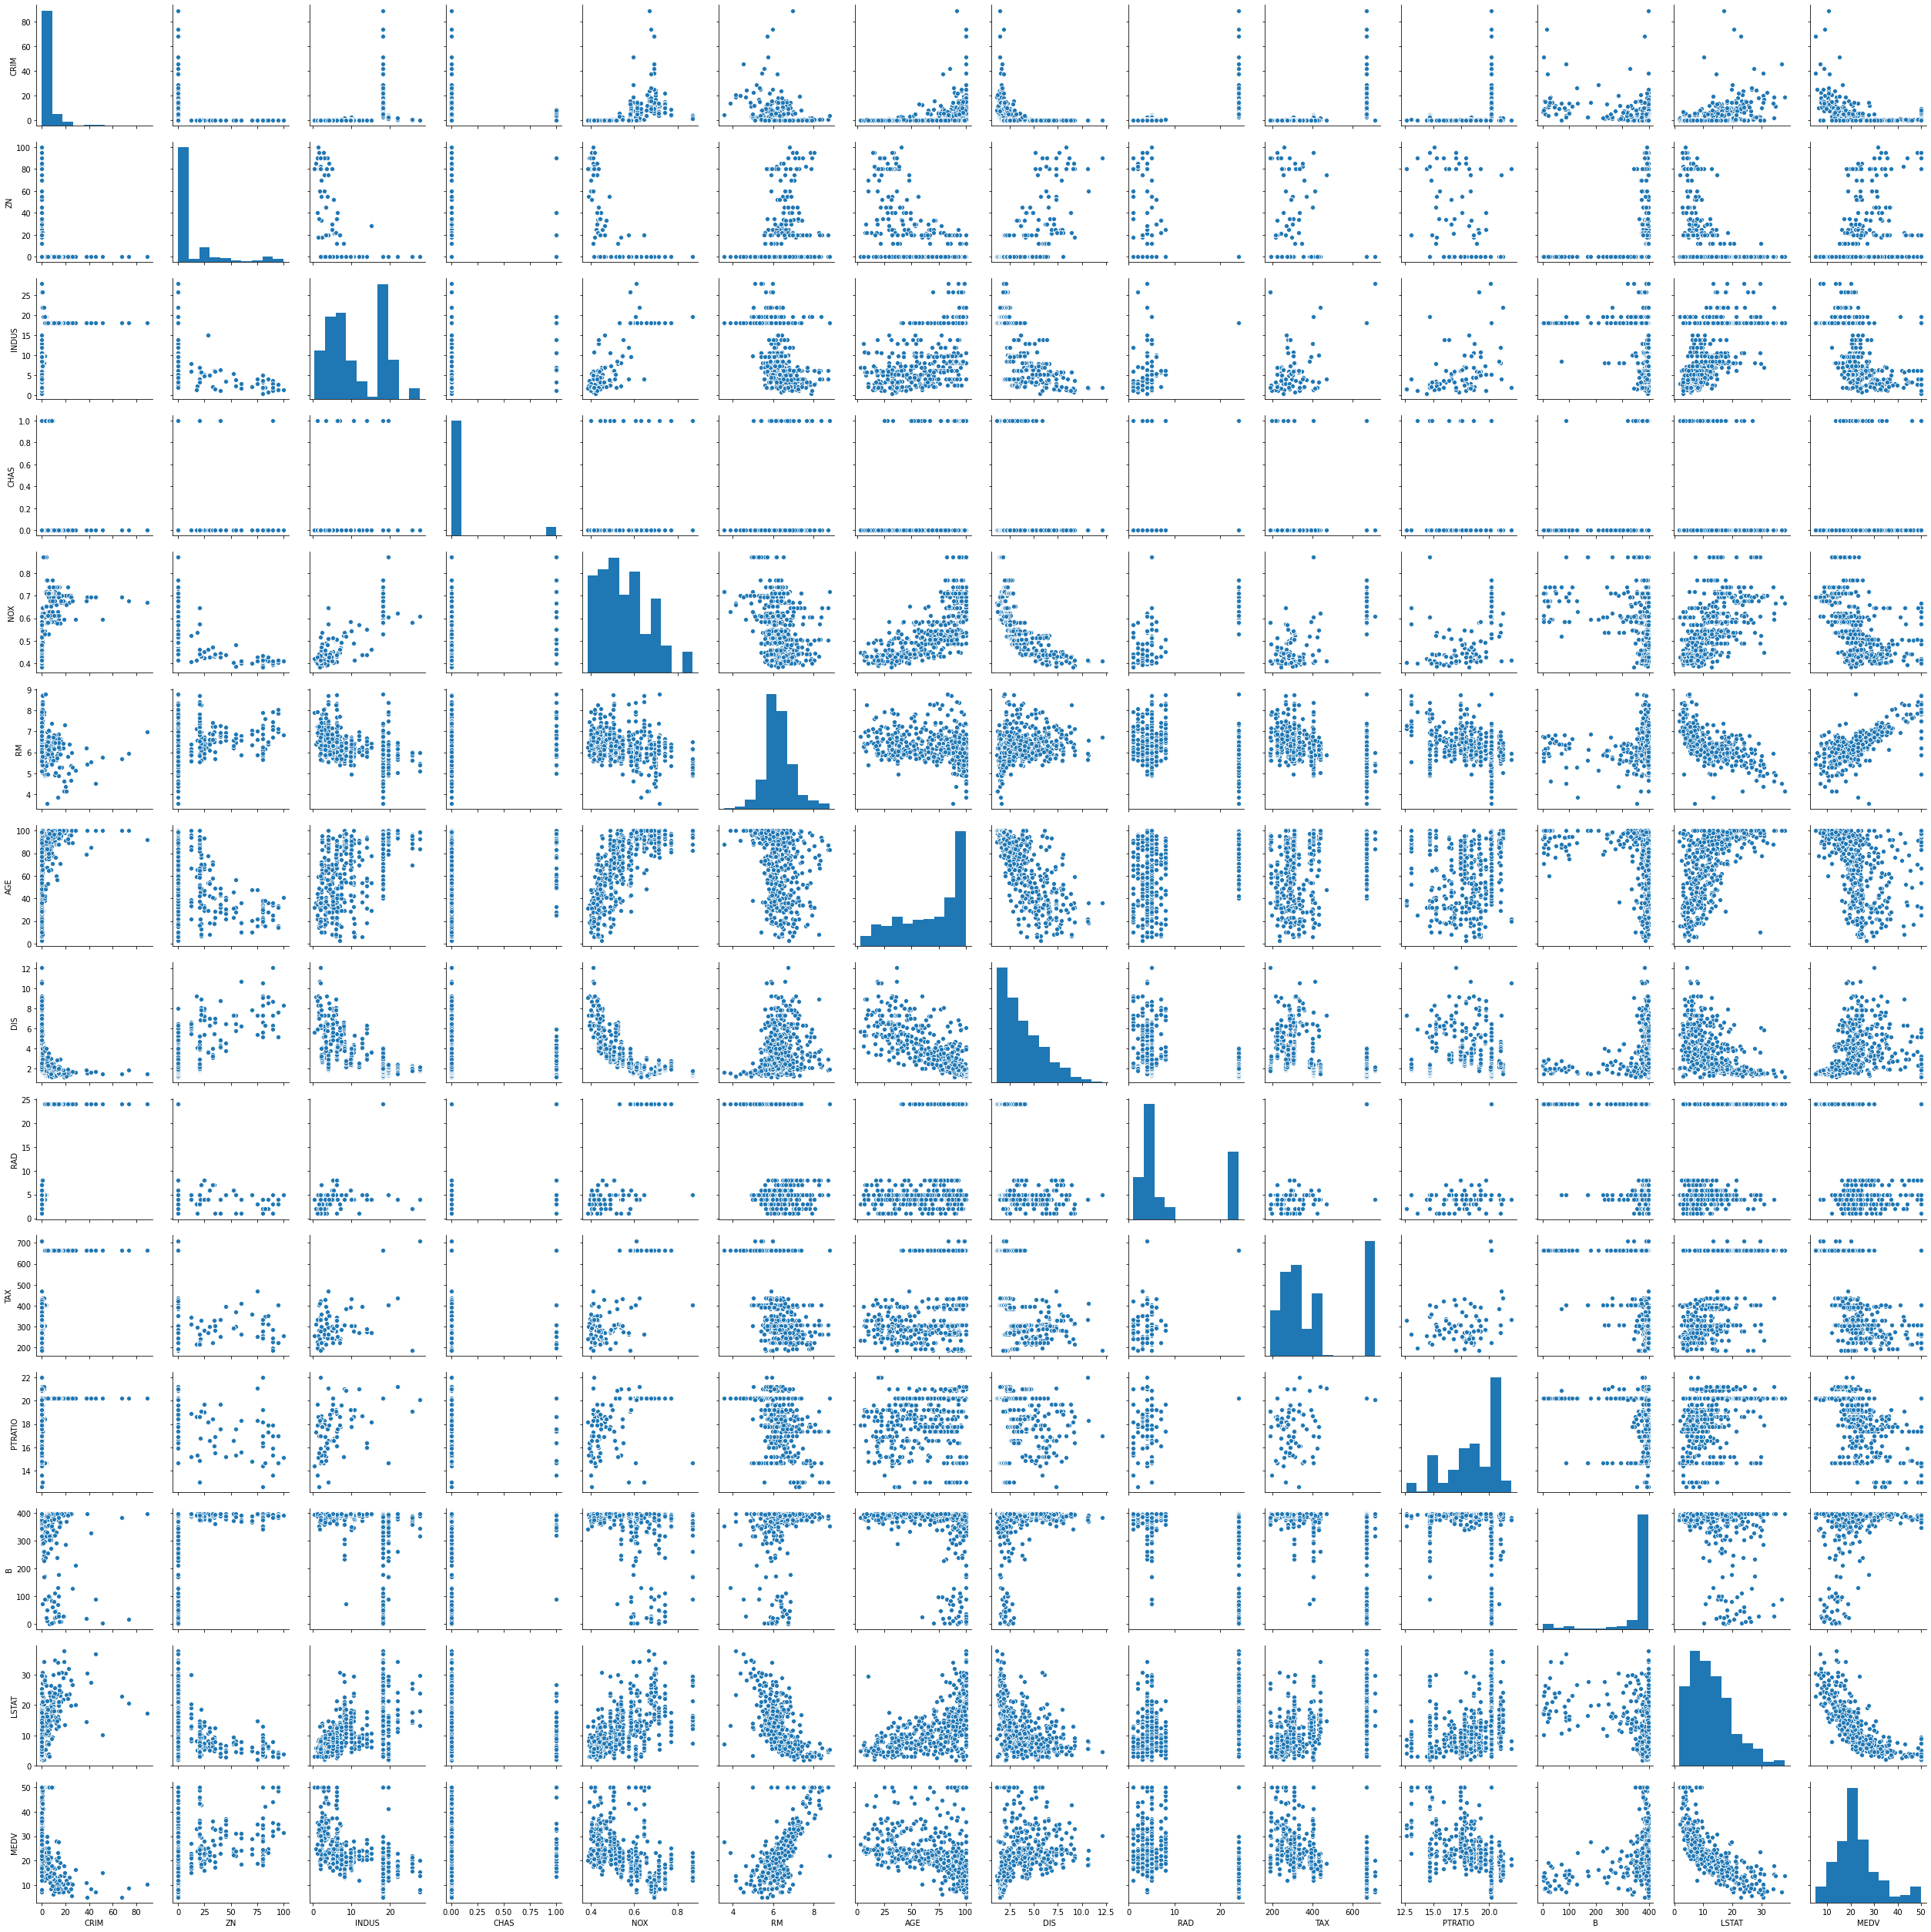

In [11]:
sns.pairplot(bos)

- Next, present the correlation matrix as a heatmap to quantify which predictors variables are more correlated to the target feature & by how much.

<AxesSubplot:>

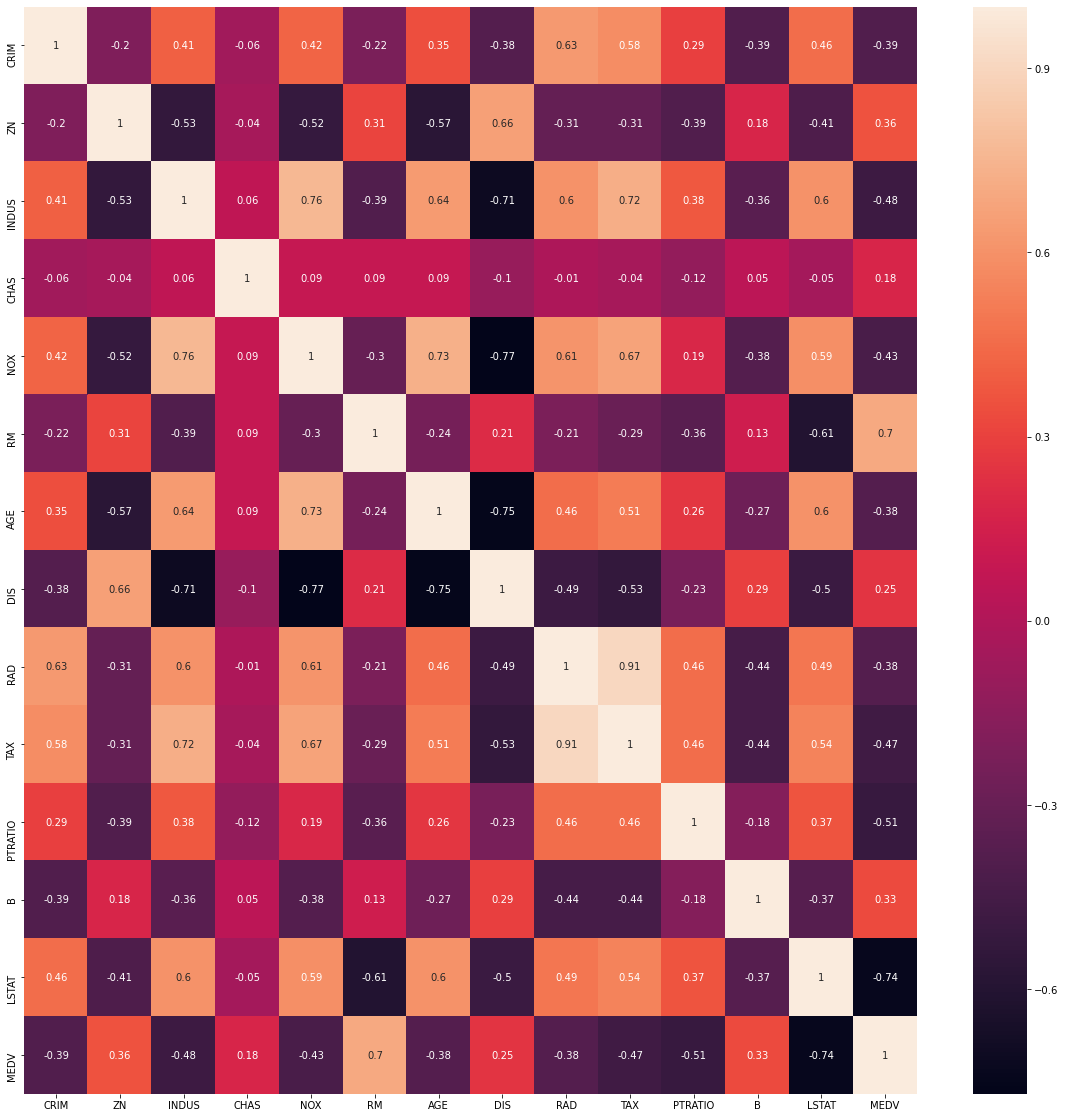

In [12]:
plt.figure(figsize = (20, 20))
sns.heatmap(bos.corr().round(2), annot=True)

- Based on the above heatmap, we can assume that predictors like RM & LSTAT will be useful to us.
- Some predictor features also seem to have multicollinearity present in them. We should be careful while considering those features simultaneously.

## MODEL PREPARATION
- We shall be standardize the whole dataset such that mean becomes 0 & SD becomes 1.
- Next we shall separate our dataset into training & testing datasets.
- We shall be using the statsmodels api to identify the important predictors using the adjusted R squared as the accuracy score.
- After choosing optimal predictors, we shall use scikit-learn API for prediction purposes.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [24]:
# standardization
features= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
std_bos= StandardScaler().fit_transform(bos.drop(['MEDV'], axis= 1).values)
std_bos= pd.DataFrame(std_bos, index= bos.index, columns= features)
std_bos['MEDV']= bos['MEDV']

In [25]:
# train test split
x_train, x_test= train_test_split(std_bos, test_size= 0.3, random_state= 42)

### FORMULATING THE HYPOTHESES
- H0: No relationship exists among the predictors & the target.
- H1: The target is dependent on the predictors, & there is some relationship.

In [26]:
lr_model = smf.ols(formula='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data= x_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           4.96e-92
Time:                        06:54:08   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5095      0.259     86.903      0.000      22.000      23.019
CRIM          -1.1469      0.351     -3.271      0.001      -1.837      -0.457
ZN             0.8343      0.411      2.029      0.043       0.025       1.643
INDUS          0.3394      0.499      0.680      0.497      -0.642       1.321
CHAS           0.7916      0.263      3.010      0.003       0.274       1.309
NOX           -1.7847      0.550     -3.246      0.001      -2.866      -0.703
RM             2.8478      0.348      8.181      0.000       2.163       3.533
AGE           -0.3043      0.454     -0.671      0.503      -1.197       0.588
DIS           -2.9156      0.508     -5.734      0.000      -3.916      -1.916
RAD            2.1114      0.713      2.963      0.003       0.710       3.513
TAX           -1.4652      0.777     -1.886      0.060      -2.993       0.063
PTRATIO       -1.9696      0.334     -5.905      0.000      -2.626      -1.314
B              1.0757      0.304      3.534      0.000       0.477       1.674
LSTAT         -3.9031      0.423     -9.219      0.000      -4.736      -3.070
==============================================================================
Omnibus:                      115.779   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.270
Skew:                           1.381   Prob(JB):                    3.08e-100
Kurtosis:                       7.842   Cond. No.                         9.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Features ZN, INDUS, AGE, TAX seem to have higher p-values (0.05) so we fail to reject H0 for these features.
- We check the adjusted R-squared again by removing these features:

In [32]:
lr_model = smf.ols(formula='MEDV ~ CRIM+CHAS+NOX+RM+DIS+RAD+PTRATIO+B+LSTAT', data= x_train).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     107.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.49e-94
Time:                        07:11:26   Log-Likelihood:                -1057.3
No. Observations:                 354   AIC:                             2135.
Df Residuals:                     344   BIC:                             2173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4930      0.260     86.519      0.000      21.982      23.004
CRIM          -1.1007      0.351     -3.140      0.002      -1.790      -0.411
CHAS           0.8428      0.262      3.221      0.001       0.328       1.357
NOX           -2.0539      0.493     -4.168      0.000      -3.023      -1.085
RM             2.9117      0.335      8.683      0.000       2.252       3.571
DIS           -2.3685      0.416     -5.694      0.000      -3.187      -1.550
RAD            1.1696      0.435      2.686      0.008       0.313       2.026
PTRATIO       -2.2288      0.311     -7.164      0.000      -2.841      -1.617
B              1.0863      0.305      3.567      0.000       0.487       1.685
LSTAT         -3.9569      0.409     -9.676      0.000      -4.761      -3.153
==============================================================================
Omnibus:                      109.822   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.677
Skew:                           1.319   Prob(JB):                     3.31e-91
Kurtosis:                       7.615   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that adjusted R squared decreases due to the omission of the features.
- However, all of the features are statistically significant. So we will proceed with these features only.
- Now we can prepare an sklearn model fro prediction purposes:

In [33]:
# scikit-learn model
features= ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
lr_model= LinearRegression().fit(x_train[features], x_train[['MEDV']])

pred= lr_model.predict(x_test[features])

In [39]:
from sklearn.metrics import mean_squared_error
print('R SQUARED on TRAINING data :', lr_model.score(x_train[features], x_train[['MEDV']]))
print('MSE on TEST data :', mean_squared_error(pred, x_test[['MEDV']]))
print('R SQUARED on TEST data :', lr_model.score(x_test[features], x_test[['MEDV']]))

R SQUARED on TRAINING data : 0.7383361089271422
MSE on TEST data : 22.972890492780444
R SQUARED on TEST data : 0.6916932477747273
